In [106]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# DATA PREPARATION

## Detecting and Dealing with missing values

In [82]:
#Checking for null and misssing values
print("There are", df.isnull().values.sum(), "missing values in the dataset")

There are 0 missing values in the dataset


## Evaluating data types and type conversions

In [83]:
# A function that checks for datatypes within the dataframe
def check_data_types(dataframe):
    data_types = dataframe.dtypes
    print(data_types)

In [84]:
check_data_types(df)

state                       int32
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object


In [85]:
# Converting string columns to integers

df["international plan"] = df["international plan"].apply(lambda x: 0 if x =="no" else 1)
df["voice mail plan"] = df["voice mail plan"].apply(lambda x: 0 if x =="no" else 1 )

In [86]:
#Loading the dataset
df = pd.read_csv('Telecom_data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [87]:
#Number of columns and rows of the dataset
print("There are %d rows and %d columns in the dataset." %df.shape)

There are 3333 rows and 21 columns in the dataset.


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the information above, the columns: International plan, voice mail plan and churn are of Data types 'object' and 'bool'. For analysis, it is important to convert them to integers.

In [89]:
# Number of States
print("There are", df["state"].nunique(), "unique entries in the state Column, representing the number of states")

There are 51 unique entries in the state Column, representing the number of states


The column "state" contains categorical data. For this column, there are two options of dealing with these values: 
1. Using One-hot encoding.
2. Using LabelEncoder.

LabelEncoder was selected to replace each unique State with a unique integer. It was selected over One-hot encoding as there are 51 unique values that would increase the number of columns.

The column "phone number" was dropped. This is because it is a unique variable that serves the same purpose as the customer ID

In [90]:
# Converting string columns to integers

df["international plan"] = df["international plan"].apply(lambda x: 0 if x =="no" else 1)
df["voice mail plan"] = df["voice mail plan"].apply(lambda x: 0 if x =="no" else 1 )


In [91]:
# Dropping column
df.drop(["phone number"], axis = 1, inplace=True)


In [92]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


The target variable is "churn". This project seeks to compare the effects of the different variables in respect to the 'churn'. In order to visualize the churn rate in the organization, a plot was created

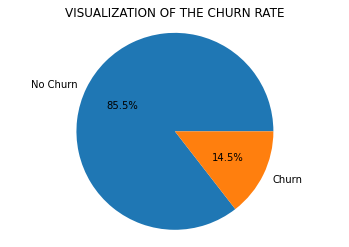

In [93]:
churn_counts = df['churn'].value_counts()
labels = ['No Churn', 'Churn']
values = churn_counts.values

plt.pie(values, labels =  labels, autopct = "%1.1f%%")
plt.title("VISUALIZATION OF THE CHURN RATE")
plt.axis('equal')
plt.show()

Investigating the effect of each feature in the dataset on the churn

In [94]:
#Defining a function that plots the comparison bar graph
def plot_churn_comparison(df, feature, stacked = True):
    churn_counts = df.groupby(feature)['churn'].value_counts().unstack()

    churn_counts.plot(kind = 'bar', stacked = stacked, figsize = (30, 10), width = 0.9, fontsize = 16)

    plt.xlabel(feature.capitalize(), fontsize = 16)
    plt.ylabel('Count', fontsize = 16)
    plt.title('Churn by ' + feature.capitalize(), fontsize = 16)

    plt.tight_layout()
    plt.show()

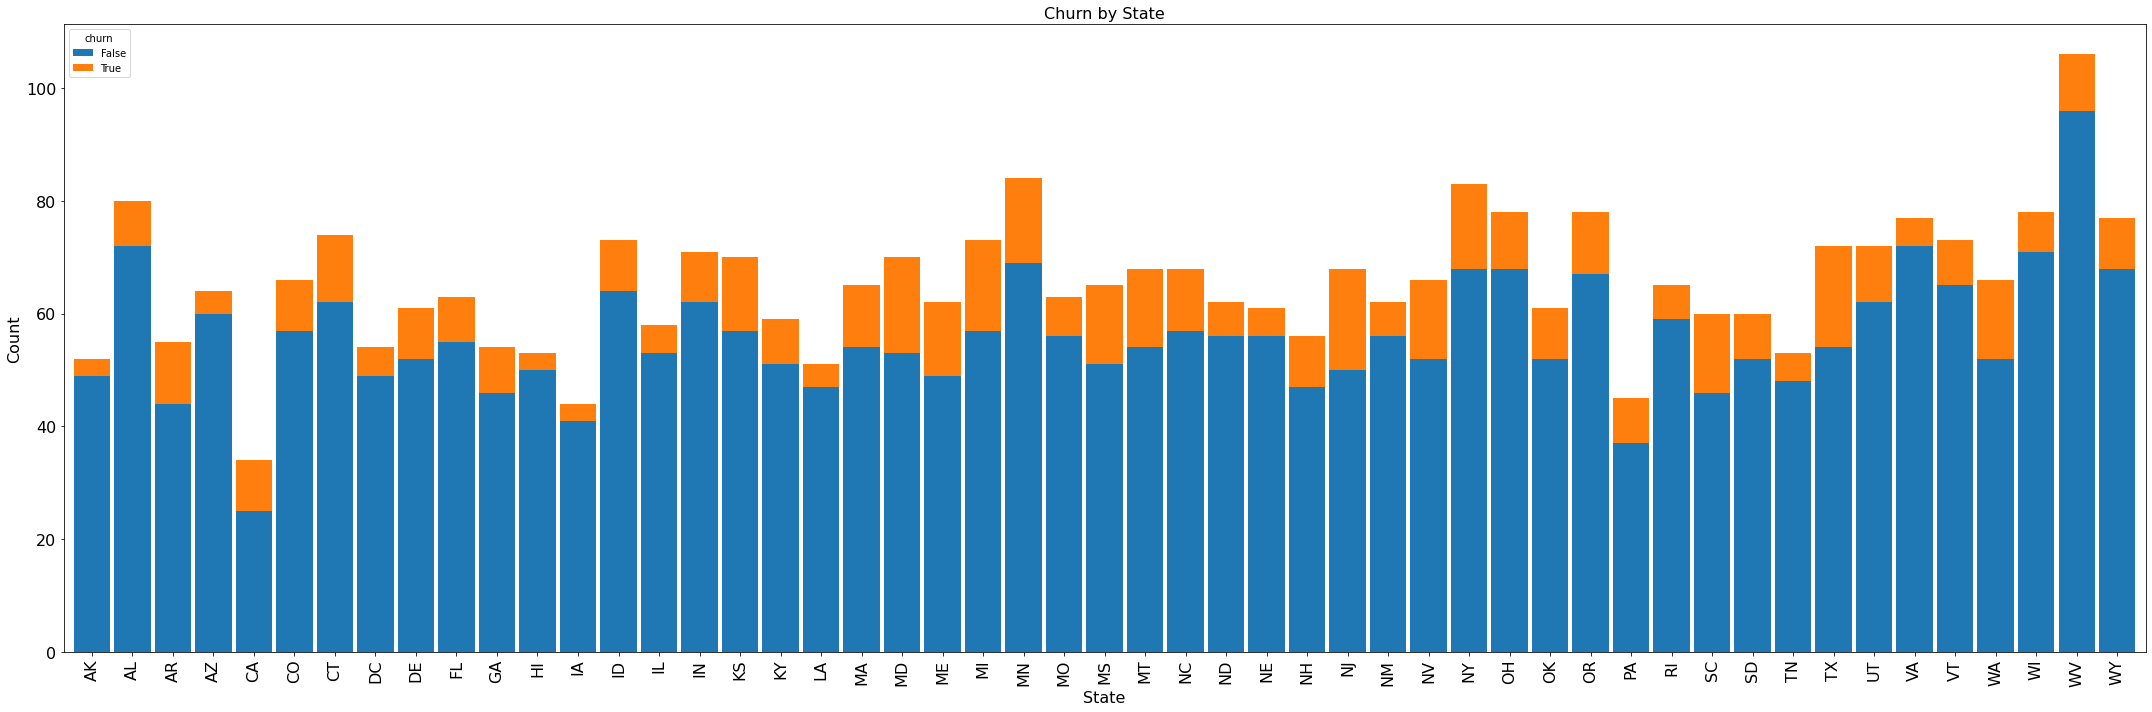

In [95]:
#Churn by customers by State
plot_churn_comparison(df, 'state', stacked = True)

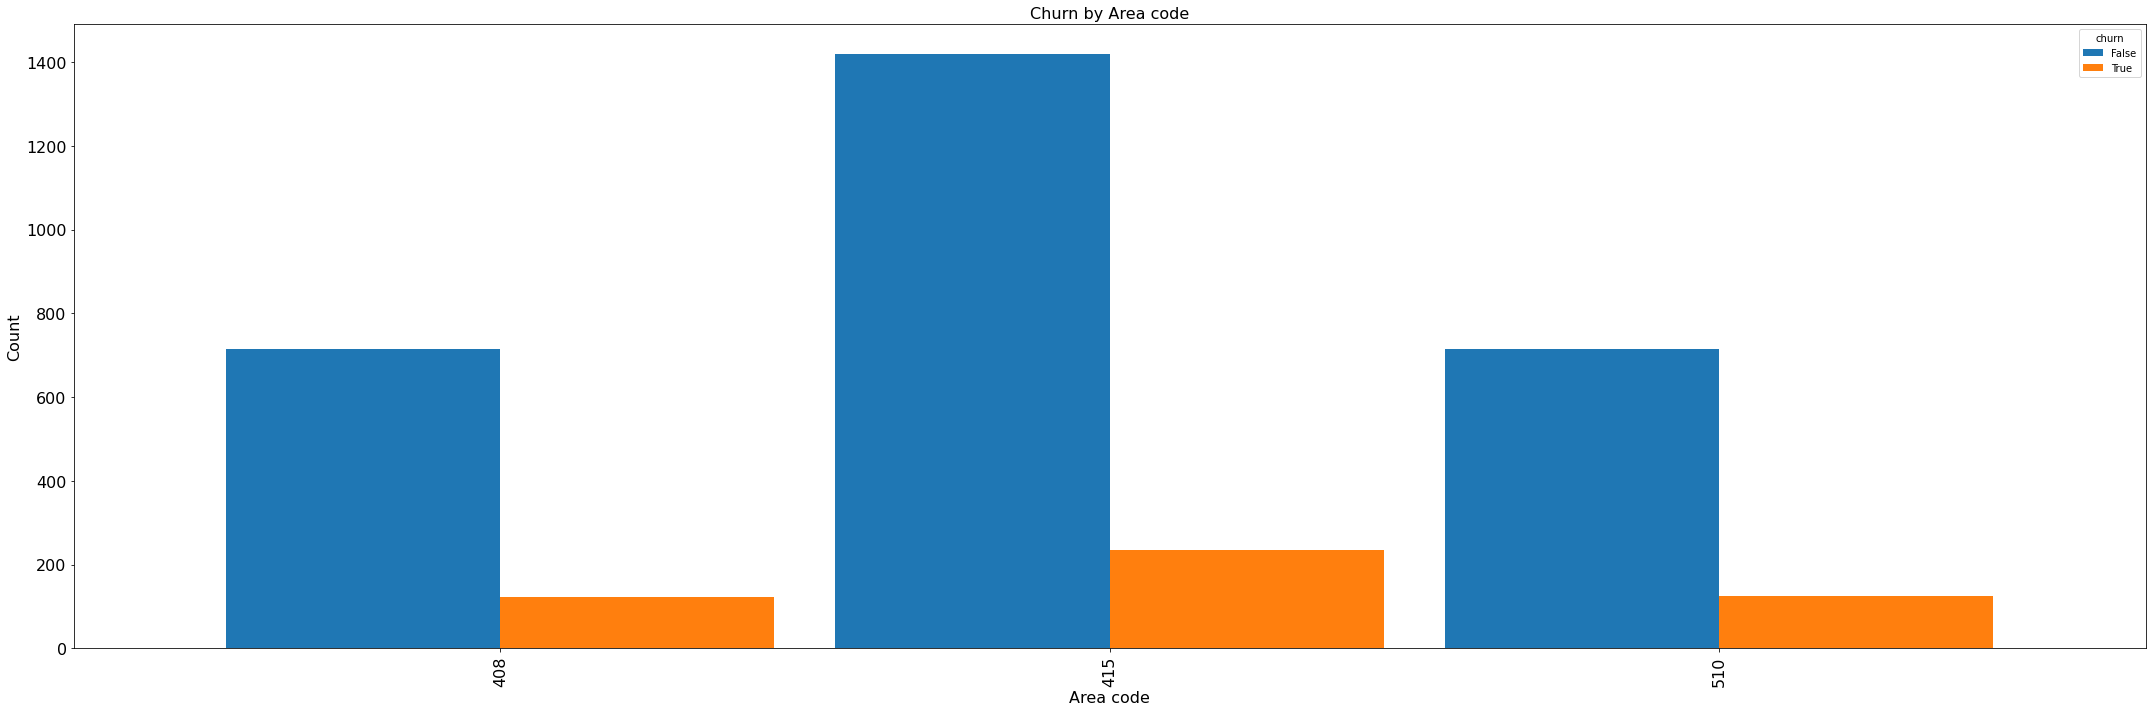

In [96]:
# Churn by customers according to area code
plot_churn_comparison(df, 'area code', stacked = False)

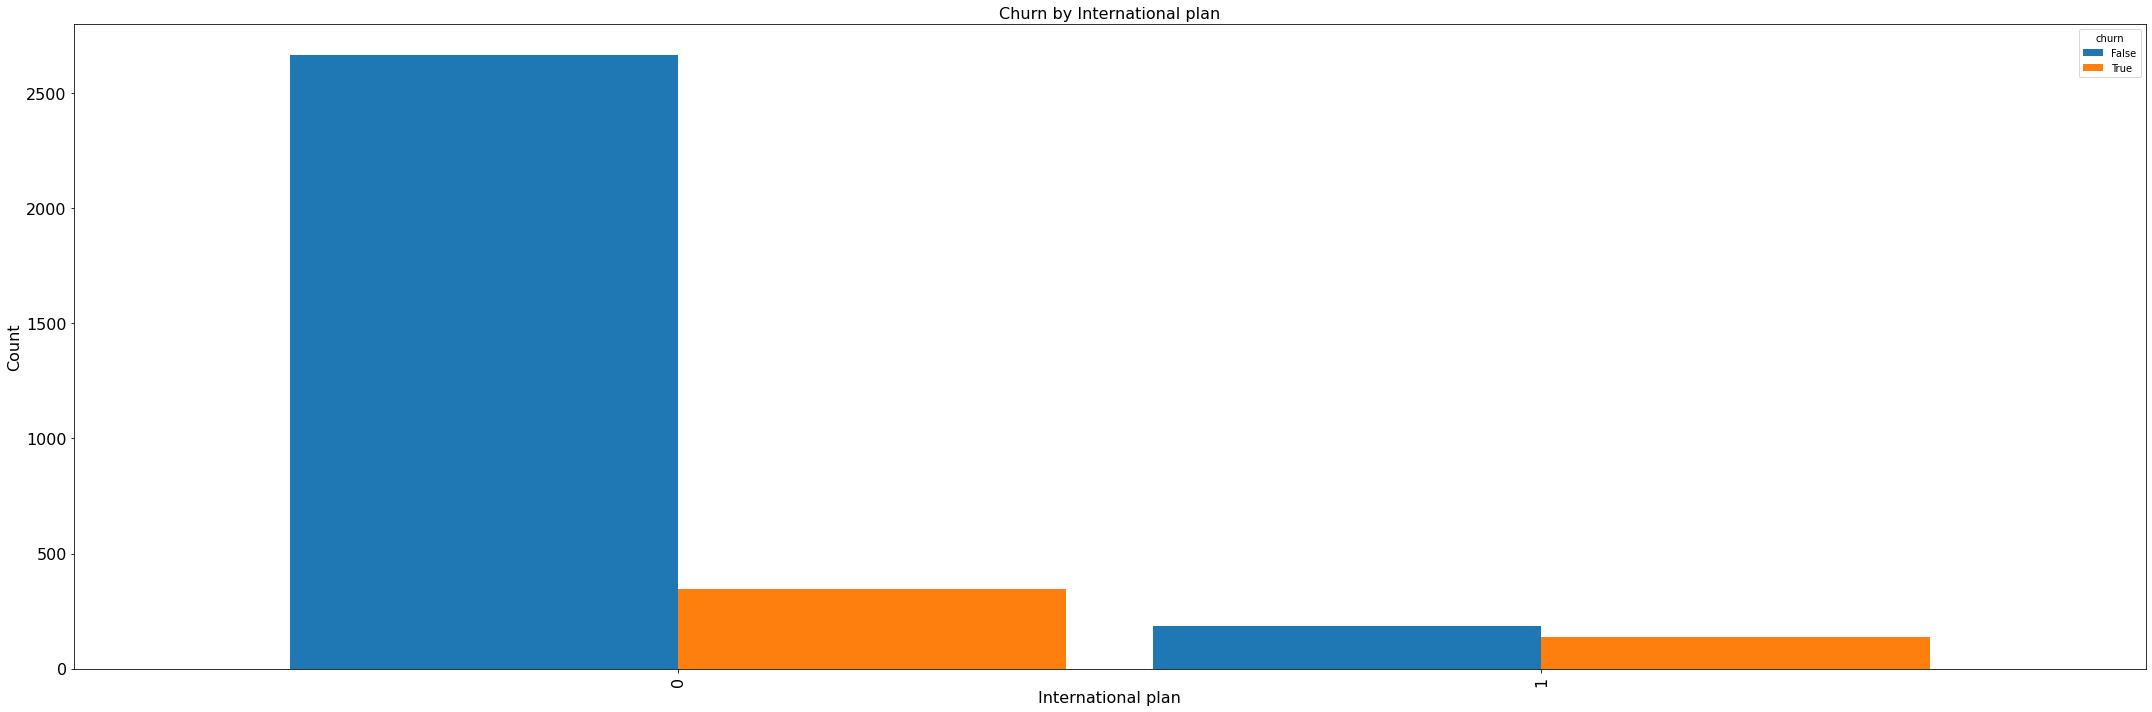

In [97]:
# Churn by customers according to whether the customer has an international plan or not
plot_churn_comparison(df, 'international plan', stacked=False)

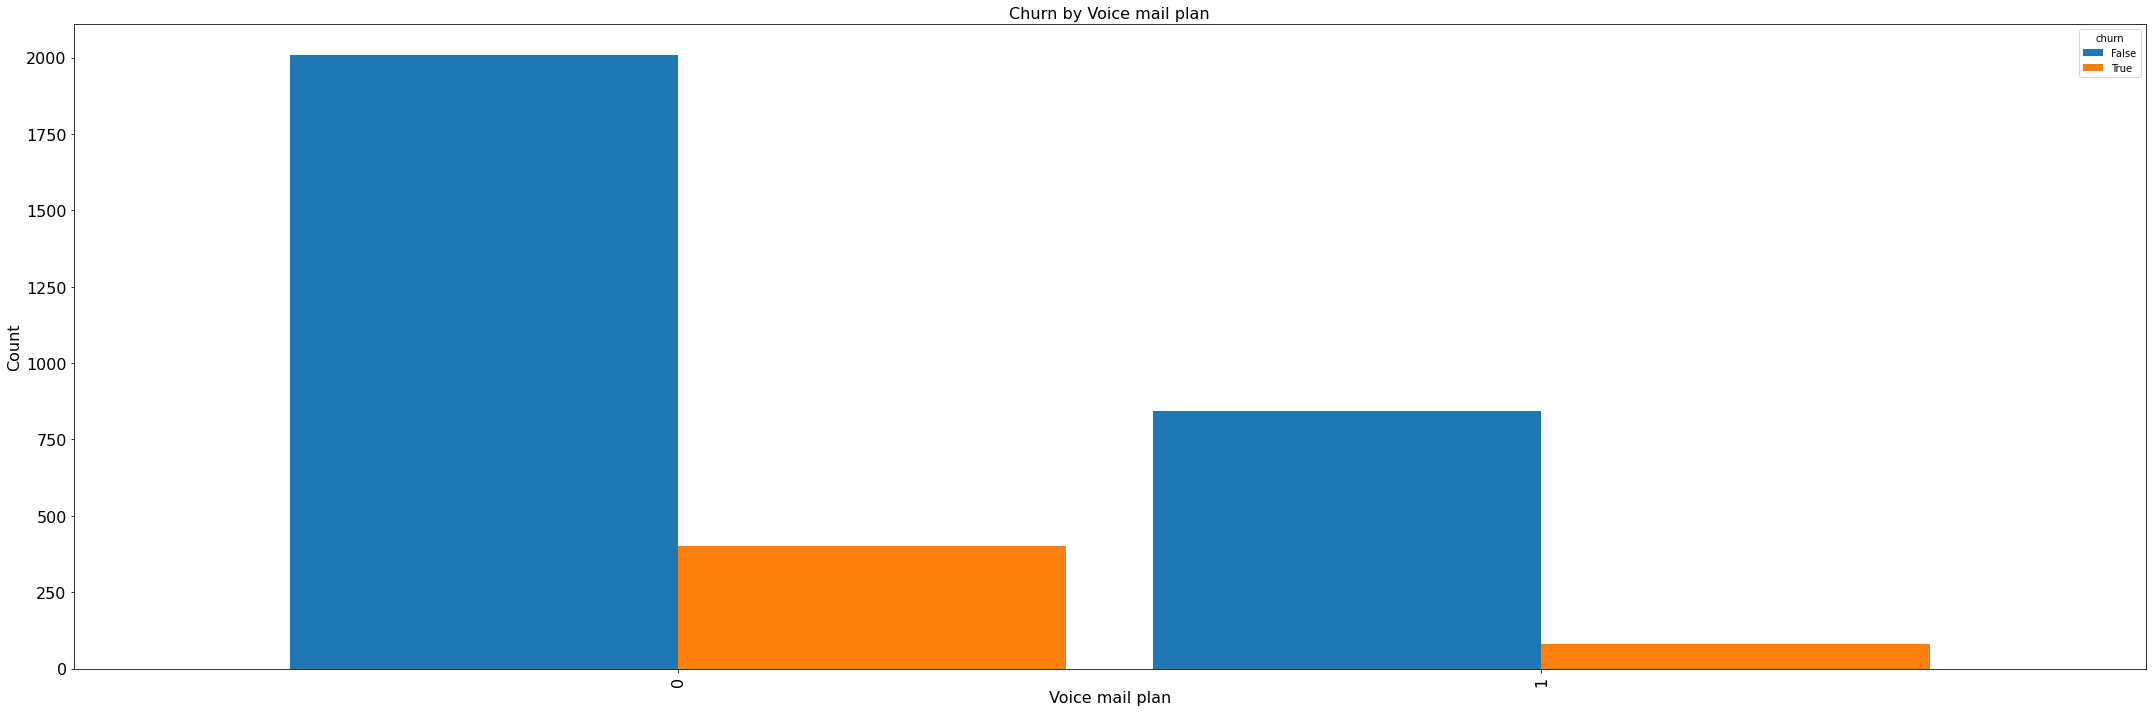

In [98]:
# Churn by customers according to whether they have a voice mail plan or not

plot_churn_comparison(df, 'voice mail plan', stacked = False)

Converting categorical data to numeric data through the use of Label Encoder

In [99]:
# Applying LabelEncoder to the column "state"

#label_encoder = LabelEncoder()
df['state'] = label_encoder.fit_transform(df['state'])

In [100]:
# Converting the 'churn' column into a numpy array of integers
y = df['churn'].values.astype(np.int)

In [101]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Building a feature matrix

In [102]:
#Dropping the target variable before building the featur matrix

df.drop(['churn'], axis = 1, inplace = True)

In [103]:
X = df.values.astype(np.float)
X

array([[ 16.  , 128.  , 415.  , ...,   3.  ,   2.7 ,   1.  ],
       [ 35.  , 107.  , 415.  , ...,   3.  ,   3.7 ,   1.  ],
       [ 31.  , 137.  , 415.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 39.  ,  28.  , 510.  , ...,   6.  ,   3.81,   2.  ],
       [  6.  , 184.  , 510.  , ...,  10.  ,   1.35,   2.  ],
       [ 42.  ,  74.  , 415.  , ...,   4.  ,   3.7 ,   0.  ]])

In [104]:
# Checking the shape of the matrix
X.shape

(3333, 19)

Standardizing the feature matrix values:

This is done to ensure fair and effective learning by bringing features to a common scale, avoiding potential issues caused by differing magnitudes, and improving the performance of certain algorithms.

In [105]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

Using Stratified Cross Validation to address the issue of Class imbalance in the target variable.